In [18]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [19]:
import numpy as np
import pandas as pd

In [20]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [21]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [22]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(engine, reflect=True)

In [7]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
measurement = Base.classes.measurement
station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

In [10]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
precip_12mos = list(session.query(measurement.date, measurement.prcp).order_by(measurement.date))
precip_12mos = pd.DataFrame(precip_12mos)
precip_12mos['date'] = pd.to_datetime(precip_12mos['date'])
precip_12mos = precip_12mos.rename(columns={'prcp':'Precipitation'})
precip_12mos = precip_12mos.sort_values(['date'], ascending=False)
precip_12mos = precip_12mos.dropna()
max_date = precip_12mos['date'].max()
one_yr_prior = max_date - pd.offsets.DateOffset(years=1)
precip_12mos = precip_12mos.loc[precip_12mos['date'] >= one_yr_prior,]
precip_12mos = precip_12mos.set_index('date')

# Calculate the date 1 year ago from the last data point in the database
# Perform a query to retrieve the data and precipitation scores
# Save the query results as a Pandas DataFrame and set the index to the date column
# Sort the dataframe by date
# Use Pandas Plotting with Matplotlib to plot the data

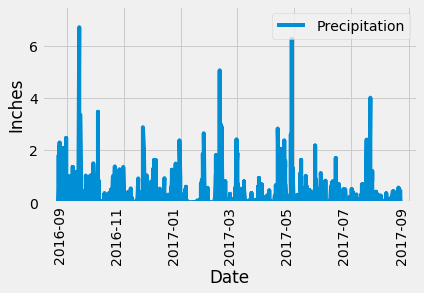

In [11]:
precip_12mos.plot()
plt.xticks(rotation='vertical')
plt.ylabel('Inches')
plt.xlabel('Date')
plt.ylim(0,7.5)
plt.show()

In [12]:
# Use Pandas to calcualte the summary statistics for the precipitation data
precip_12mos.describe()

,Precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [13]:
# Design a query to show how many stations are available in this dataset?
unique_stations = session.query(measurement.station.distinct()).count()
unique_stations

9

In [14]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
active_stations = session.query(measurement.station, func.count(measurement.station)).\
                    group_by(measurement.station).\
                    order_by(func.count(measurement.station).desc())

# for x in active_stations:
#     print(x)
print(active_stations[0][0])

USC00519281


# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?


In [15]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

act_station_12mos = list(session.query(measurement.date, measurement.tobs).order_by(measurement.date).filter(measurement.station == active_stations[0][0]))
act_station_12mos = pd.DataFrame(act_station_12mos)
act_station_12mos['date'] = pd.to_datetime(act_station_12mos['date'])
act_station_12mos = act_station_12mos.sort_values(['date'], ascending=False)
act_station_12mos = act_station_12mos.dropna()
max_date = act_station_12mos['date'].max()
one_yr_prior = max_date - pd.offsets.DateOffset(years=1)
act_station_12mos = act_station_12mos.loc[act_station_12mos['date'] >= one_yr_prior,]
act_station_12mos = act_station_12mos.set_index('date')

act_station_12mos.describe()

,tobs
count,357.000000
mean,73.196078
std,4.759460
min,59.000000
25%,70.000000
50%,74.000000
75%,77.000000
max,83.000000


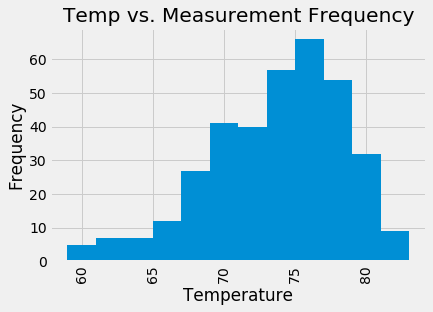

In [16]:
act_station_12mos.hist(bins=12)
plt.xticks(rotation='vertical')
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.title('Temp vs. Measurement Frequency')
plt.show()

## Bonus Challenge Assignment

In [17]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

NameError: name 'Measurement' is not defined

In [ ]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.


In [ ]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)


In [ ]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation



In [ ]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

In [ ]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [ ]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [ ]:
# Plot the daily normals as an area plot with `stacked=False`
